Import packages

In [1]:
%pip install jupyterlab-rise
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

Define functions:
generate_sine_waves(frequencies, duration, sample_reate) generates a multi sine waveform
play_sine_wave(frequencies, duration, sample_rate, amplitude) generates and plays the audio wave

In [4]:
def generate_sine_wave(frequencies, amplitudes, duration, sample_rate=44100):
    """
    Generate a sine wave of a single or multiple frequencies

    Args:
        frequencies (list of floats): List of frequencies [Hz]
        amplitudes (list of floats): List of amplitudes corresponding to the frequencies
        duration (float): Duration of the wave [s]
        sample_rate (int): Sampling rate [Hz] (default 44100 Hz)

    Returns:
        wave (np.ndarray): The combined sine wave as a numpy array
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = np.zeros_like(t)
    for f, amp in zip(frequencies, amplitudes):
        wave += amp * np.sin(2 * np.pi * f * t)
    return t, wave

In [6]:
def play_sine_wave(frequencies, amplitudes, duration, sample_rate=44100):
    """
    Generates and plays a sine wave.

    Args:
        frequencies (list of floats): List of frequencies [Hz]
        amplitudes (list of floats): List of amplitudes corresponding to the frequencies
        duration (float): Duration of the wave [s]
        sample_rate (int): Sampling rate [Hz] (default 44100 Hz)
    """
    t, wave = generate_sine_wave(frequencies, amplitudes, duration, sample_rate)
    sd.play(wave, samplerate=sample_rate)
    sd.wait()  # Wait until the sound finishes playing

In [8]:
def plot_wave(t, wave, title="Waveform in Time Domain"):
    """
    Plot in time domain

    Args:
        t (np.ndarray): Time array [s]
        wave (np.ndarray): Waveform array as a numpy array
        title (str): Title of the plot 
    """
    plt.figure(figsize=(10, 4))
    plt.plot(t, wave, label="Waveform")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
def compute_fourier_coefficients(signal, sample_rate=44100):
    """
    Compute the Fourier coefficients with padded zeros

    Args:
        signal (np.ndarray): The input signal (time-domain [s])
        sample_rate (float): The sampling rate of the signal [Hz] (default 44100 Hz)

    Returns:
        frequencies (np.ndarray): Frequencies corresponding to the Fourier coefficients
        coefficients (np.ndarray): Fourier coefficients (complex values)
    """
    N = len(signal)  # Number of samples
    
    coefficients = np.fft.fft(signal) / N  # Normalize by N to get true amplitudes
    frequencies = np.fft.fftfreq(N, d=1/sample_rate)  # Frequency bins
    return frequencies, coefficients

In [12]:
def plot_frequencies(frequencies, coefficients, max_frequency=500, title="Fourier Coefficients"):
    """
    Plot the Fourier coefficients (in magnitude) as a function of frequency.

    Args:
        frequencies (np.ndarray): Frequencies corresponding to the Fourier coefficients
        coefficients (np.ndarray): Fourier coefficients (complex values)
        title (str): Title of the plot
    """
    # Only plot the positive frequencies
    #positive_freqs = frequencies > 0
    plt.figure(figsize=(10, 4))
    plt.stem(frequencies, np.abs(coefficients), basefmt=" ")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.grid()
    plt.xlim(-max_frequency, max_frequency)
    plt.ylim(-0.05,1)
    x_ticks = np.arange(-max_frequency, max_frequency, 50) 
    plt.xticks(x_ticks)
    y_ticks = np.arange(0,1,0.1)
    plt.yticks(y_ticks)
    plt.tight_layout()

    plt.show()

Frequencies and amplitudes

In [39]:
frequencies = [120, 300, 400] 
amplitudes = [1, 0.25, 0.75]
duration = 2.0

Play Chord

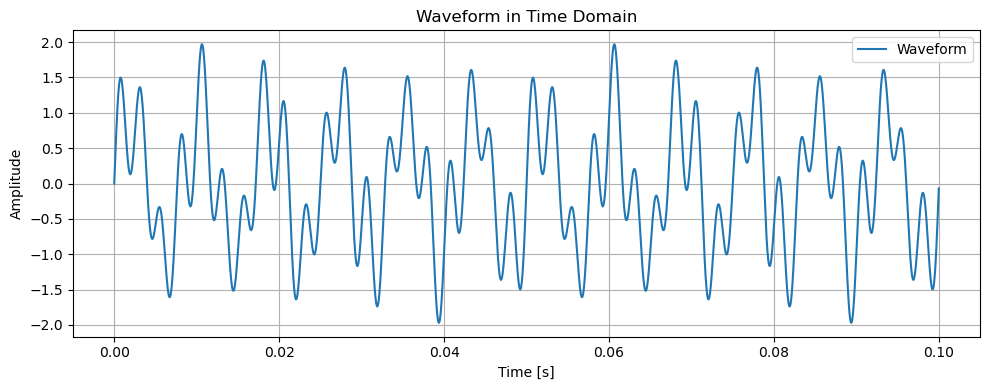

In [50]:
play_sine_wave(frequencies, amplitudes, duration)

duration = 0.1
t, wave = generate_sine_wave(frequencies, amplitudes, duration)

plot_wave(t, wave)

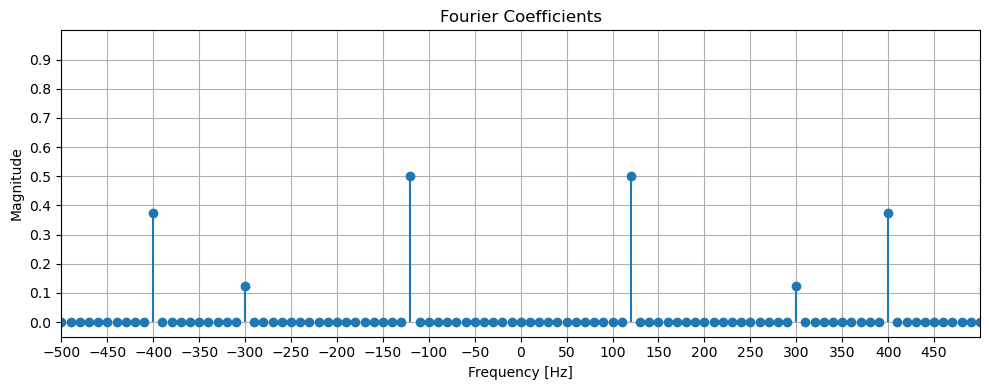

In [20]:
f, D = compute_fourier_coefficients(wave)

plot_frequencies(f, D, 500)